In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
#bring in the data
df_train = pd.read_csv('train.csv')

In [3]:
df_train.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
1455         Lvl    AllPub    ...            0    NaN    NaN         NaN   
1456         Lvl    AllPub    ...            0    NaN  MnPrv         NaN   
1457         Lvl    AllPub    ...            0    NaN  GdPrv        Shed   
1458         Lvl    AllPub    ...            0    NaN    NaN         NaN   
1459         Lvl    AllPub    ...            0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455       0      8   2007        WD         Normal     175000  
1456       0      2   2010        WD         Normal     210000  
1457    2500      5   2010        WD         Normal     266500  
1458       0      4   2010        WD         Normal     142125  
1459       0      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [4]:
#check the columns
len(df_train.columns), df_train.columns

(81, Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'Garage

## 1. SalePrice 살펴보기

In [5]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

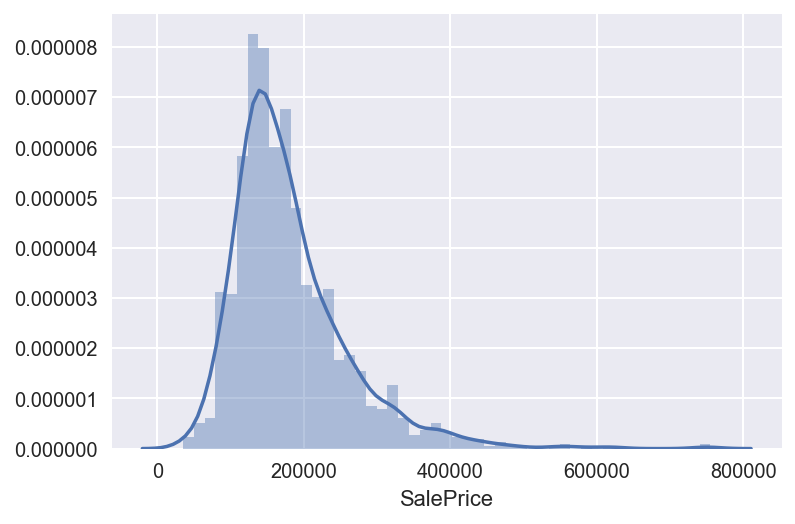

In [6]:
#histogram
sns.distplot(df_train['SalePrice'])

In [7]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print('Kurtosis: %f' % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### * probplot ?


 mu = 180921.20 and sigma = 79415.29



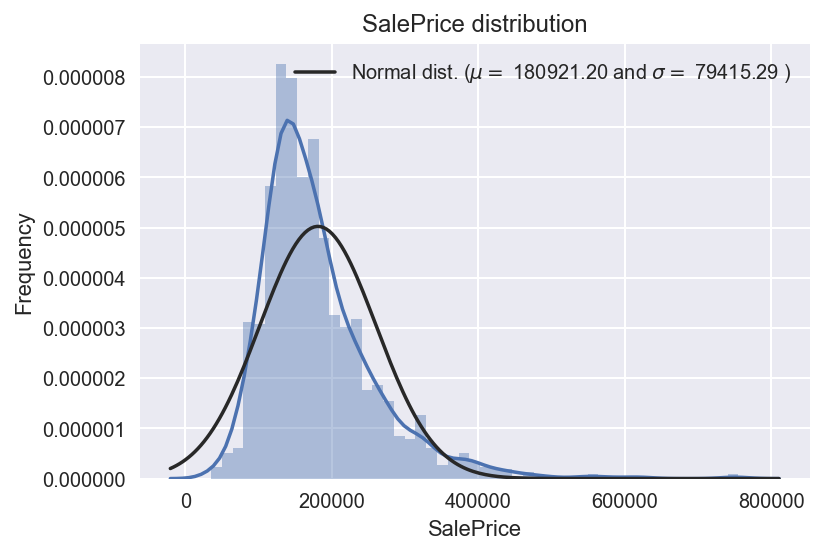

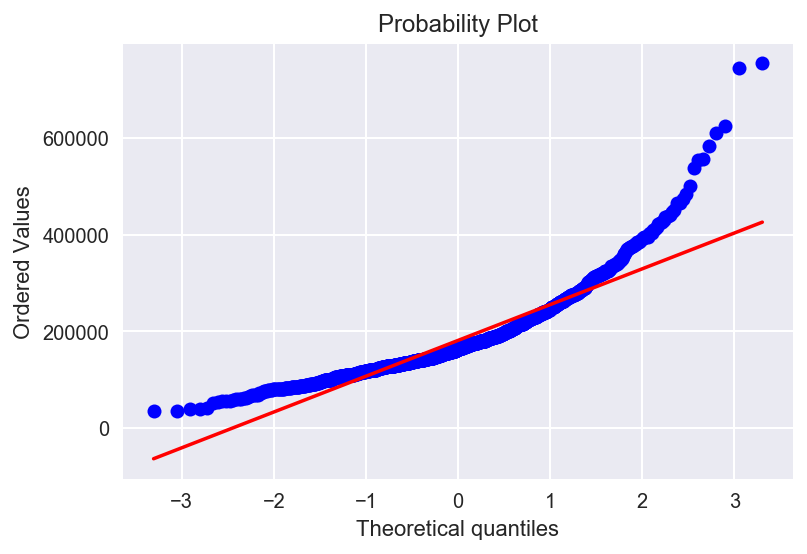

In [8]:
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

## 2. Outliers 처리하기

- There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students.
- DataDoucumentation에 따르면 5개(확인해보니 4개)의 데이터는 명백한 outlier로 제거하길 권장하고 있다. 따라서 Outlier를 먼저 제거하고 데이터 탐색을 시작하도록 한다.

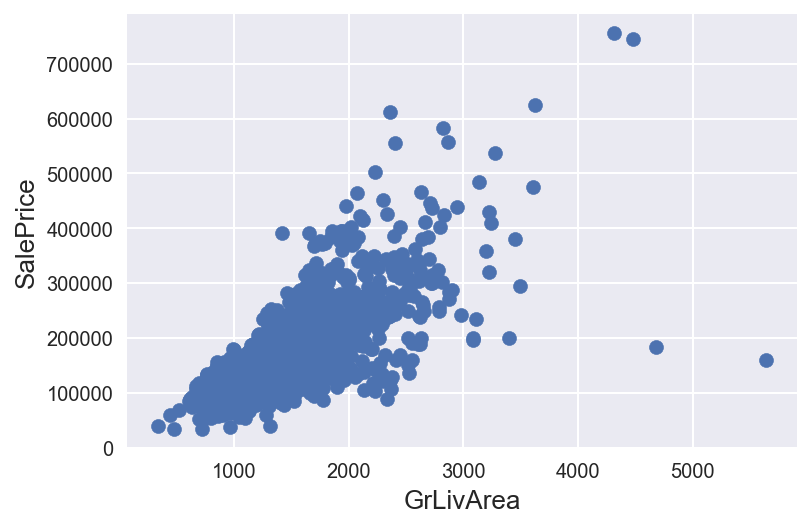

In [9]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

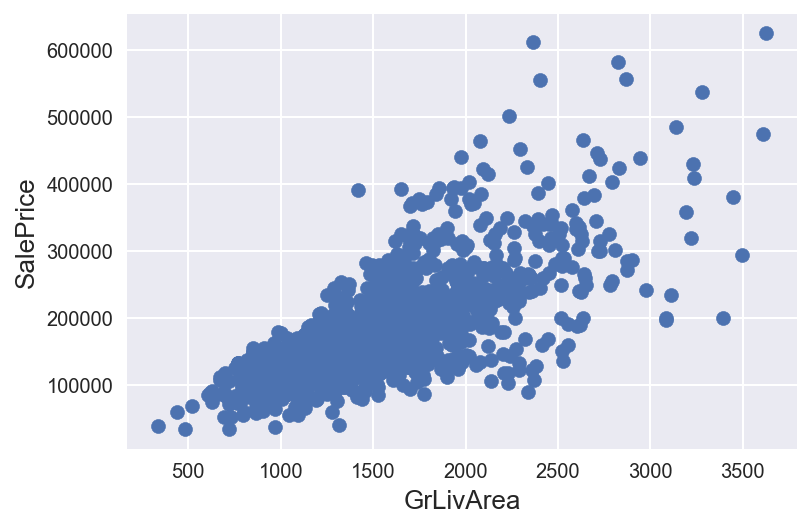

In [10]:
#Deleting outliers
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## 3. Missing Data 처리하기

In [11]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1456.000000  1456.000000  1197.000000    1456.000000  1456.000000   
mean    729.967033    56.888736    69.693400   10448.784341     6.088599   
std     421.722909    42.358363    23.054474    9860.763449     1.369669   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     364.750000    20.000000    59.000000    7538.750000     5.000000   
50%     730.500000    50.000000    69.000000    9468.500000     6.000000   
75%    1094.250000    70.000000    80.000000   11588.000000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond   YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1456.000000  1456.00000   1456.000000  1448.000000  1456.000000   
mean      5.576236  1971.18544   1984.819368   102.087707   436.991071   
std       1.113966    30.20159     20.652143   177.338930   430.255052   
min       1.000000  1872.00000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.00000   1966.750000     0.000000     0.000000   
50%       5.000000  1972.00000   1993.500000     0.000000   381.000000   
75%       6.000000  2000.00000   2004.000000   164.250000   706.500000   
max       9.000000  2010.00000   2010.000000  1600.000000  2188.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1456.000000  1456.000000    1456.000000  1456.000000   
mean       ...          93.833791    46.221154      22.014423     3.418956   
std        ...         125.192349    65.352424      61.192248    29.357056   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    24.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1456.000000  1456.000000   1456.000000  1456.000000  1456.000000   
mean     15.102335     2.055632     43.608516     6.326236  2007.817308   
std      55.828405    35.383772    496.799265     2.698356     1.329394   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1456.000000  
mean   180151.233516  
std     76696.592530  
min     34900.000000  
25%    129900.000000  
50%    163000.000000  
75%    214000.000000  
max    625000.000000  

[8 rows x 38 columns]

- min 값이 0인 칼럼들을 확인할 수 있다.
- min 값이 0이 나올 수 없는 칼럼들이 존재하므로, 이는 missing data가 존재함을 의미한다.

In [12]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent],axis=1,keys=['Total','Percent'])
missing_data.head(50)

Total   Percent
PoolQC          1451  0.996566
MiscFeature     1402  0.962912
Alley           1365  0.937500
Fence           1176  0.807692
FireplaceQu      690  0.473901
LotFrontage      259  0.177885
GarageCond        81  0.055632
GarageType        81  0.055632
GarageYrBlt       81  0.055632
GarageFinish      81  0.055632
GarageQual        81  0.055632
BsmtExposure      38  0.026099
BsmtFinType2      38  0.026099
BsmtFinType1      37  0.025412
BsmtCond          37  0.025412
BsmtQual          37  0.025412
MasVnrArea         8  0.005495
MasVnrType         8  0.005495
Electrical         1  0.000687
Utilities          0  0.000000
YearRemodAdd       0  0.000000
MSSubClass         0  0.000000
Foundation         0  0.000000
ExterCond          0  0.000000
ExterQual          0  0.000000
Exterior2nd        0  0.000000
Exterior1st        0  0.000000
RoofMatl           0  0.000000
RoofStyle          0  0.000000
YearBuilt          0  0.000000
LotConfig          0  0.000000
OverallCond        0  0.000000
OverallQual        0  0.000000
HouseStyle         0  0.000000
BldgType           0  0.000000
Condition2         0  0.000000
BsmtFinSF1         0  0.000000
MSZoning           0  0.000000
LotArea            0  0.000000
Street             0  0.000000
Condition1         0  0.000000
Neighborhood       0  0.000000
LotShape           0  0.000000
LandContour        0  0.000000
LandSlope          0  0.000000
SalePrice          0  0.000000
HeatingQC          0  0.000000
BsmtFinSF2         0  0.000000
EnclosedPorch      0  0.000000
Fireplaces         0  0.000000

- 더 자세히 살펴보니, 칼럼별로 missing value의 수가 상이하다. 이는 칼럼별로 missing data를 처리하는 방법이 달라야한다는 것을 의미한다.
- Missing Value를 처리하는 방법은 크게 2가지로 나눠볼 수 있다. 1.삭제하기 2. 대체하기

### 1. PoolQC
- 이 칼럼의 missing data는 pool이 없음을 의미하므로, None으로 대체한다.

In [13]:
df_train["PoolQC"] = df_train["PoolQC"].fillna("None")

### 2. MiscFeature
- 이 칼럼의 missing data는 miscellaneous fearture가 없음을 의미하므로, None으로 대체한다.

In [14]:
df_train["MiscFeature"] = df_train["MiscFeature"].fillna("None")

### 3. Alley
- 이 칼럼의 missing data는 ally access가 없음을 의미하므로, None으로 대체한다.

In [15]:
df_train["Alley"] = df_train["Alley"].fillna("None")

### 4. Fence
- 이 칼럼의 missing data는 fence가 없음을 의미하므로, None으로 대체한다.

In [16]:
df_train["Fence"] = df_train["Fence"].fillna("None")

### 5. FireplaceQu
- 이 칼럼의 missing data는 fire place가 없음을 의미하므로, None으로 대체한다.

In [17]:
df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna("None")

### 6. LotFrontage
- 대부분의 집은 주변 집들의 lot 사이즈와 비슷하므로, neighborhood로 groupby한 LotFrontage의 평균값으로 대체한다.

In [18]:
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

### 7. GarageType, GarageFinish, GarageQual and GarageCond
- 이 칼럼의 missing data는 Garage가 없음을 의미하므로, None으로 대체한다.

In [19]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    df_train[col] = df_train[col].fillna('None')

### 8. GarageYrBlt, GarageArea and GarageCars
- 이 칼럼의 missing data는 Garage가 없는 정량 데이터이므로, 0으로 대체한다.

In [20]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df_train[col] = df_train[col].fillna(0)

### 9. BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath 
- 이 칼럼의 missing data는 Basement가 없는 정량 데이터이므로, 0으로 대체한다.

In [21]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df_train[col] = df_train[col].fillna(0)

### 10. BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2
- 이 칼럼의 missing data는 Basement가 없음을 의미하므로, None으로 대체한다.

In [22]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_train[col] = df_train[col].fillna('None')

### 11. MasVnrArea, MasVnrType 
- 이 칼럼의 missing data는 Veneer가 없음을 의미하므로, 0과 None으로 대체한다.

In [23]:
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("None")
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

### 12. MSZoning
- MSZoning의 최빈값으로 대체한다. ('RL')

In [24]:
df_train['MSZoning'] = df_train['MSZoning'].fillna(df_train['MSZoning'].mode()[0])

### 13. Utilities
- Utilities의 최빈값으로 대체한다. ('AllPub')

In [25]:
df_train['Utilities'] = df_train['Utilities'].fillna(df_train['Utilities'].mode()[0])

### 14. Electrical
- Electrical의 최빈값으로 대체한다. ('SBrkr')

In [26]:
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

In [27]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent],axis=1,keys=['Total','Percent'])
missing_data.head(50)

Total  Percent
SalePrice          0      0.0
Heating            0      0.0
RoofStyle          0      0.0
RoofMatl           0      0.0
Exterior1st        0      0.0
Exterior2nd        0      0.0
MasVnrType         0      0.0
MasVnrArea         0      0.0
ExterQual          0      0.0
ExterCond          0      0.0
Foundation         0      0.0
BsmtQual           0      0.0
BsmtCond           0      0.0
BsmtExposure       0      0.0
BsmtFinType1       0      0.0
BsmtFinSF1         0      0.0
BsmtFinType2       0      0.0
BsmtFinSF2         0      0.0
BsmtUnfSF          0      0.0
YearRemodAdd       0      0.0
YearBuilt          0      0.0
OverallCond        0      0.0
LandContour        0      0.0
MSSubClass         0      0.0
MSZoning           0      0.0
LotFrontage        0      0.0
LotArea            0      0.0
Street             0      0.0
Alley              0      0.0
LotShape           0      0.0
Utilities          0      0.0
OverallQual        0      0.0
LotConfig          0      0.0
LandSlope          0      0.0
Neighborhood       0      0.0
Condition1         0      0.0
Condition2         0      0.0
BldgType           0      0.0
HouseStyle         0      0.0
TotalBsmtSF        0      0.0
HeatingQC          0      0.0
SaleCondition      0      0.0
CentralAir         0      0.0
GarageArea         0      0.0
GarageQual         0      0.0
GarageCond         0      0.0
PavedDrive         0      0.0
WoodDeckSF         0      0.0
OpenPorchSF        0      0.0
EnclosedPorch      0      0.0

## 4. 상관관계 분석

In [28]:
corrmat = df_train.corr()
corrmat

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011076    -0.016389 -0.038041    -0.032323   
MSSubClass     0.011076    1.000000    -0.390822 -0.142192     0.032416   
LotFrontage   -0.016389   -0.390822     1.000000  0.307493     0.215877   
LotArea       -0.038041   -0.142192     0.307493  1.000000     0.088719   
OverallQual   -0.032323    0.032416     0.215877  0.088719     1.000000   
OverallCond    0.013337   -0.059277    -0.039530 -0.002832    -0.090692   
YearBuilt     -0.014034    0.027689     0.112526  0.006590     0.571712   
YearRemodAdd  -0.023076    0.040459     0.076271  0.006930     0.550971   
MasVnrArea    -0.053851    0.023441     0.167975  0.080357     0.395336   
BsmtFinSF1    -0.017821   -0.075268     0.143295  0.173426     0.213079   
BsmtFinSF2    -0.005609   -0.065598     0.059132  0.114691    -0.057520   
BsmtUnfSF     -0.007000   -0.140890     0.126676 -0.003774     0.310164   
TotalBsmtSF   -0.028312   -0.255441     0.308670  0.221940     0.532666   
1stFlrSF       0.001666   -0.265001     0.380021  0.267644     0.462042   
2ndFlrSF       0.002578    0.311294     0.048853  0.037277     0.279745   
LowQualFinSF  -0.044128    0.046499     0.035280  0.005675    -0.029826   
GrLivArea     -0.000846    0.077956     0.328379  0.231887     0.583519   
BsmtFullBath  -0.001019    0.003282     0.085074  0.147595     0.104092   
BsmtHalfBath  -0.019720   -0.002509     0.005845  0.047391    -0.047172   
FullBath       0.004005    0.132131     0.176054  0.117336     0.543791   
HalfBath       0.005248    0.177476     0.040088  0.005981     0.267431   
BedroomAbvGr   0.036774   -0.023627     0.251227  0.118960     0.096848   
KitchenAbvGr   0.003222    0.281783    -0.002910 -0.016565    -0.184281   
TotRmsAbvGrd   0.023854    0.040247     0.312838  0.173629     0.415834   
Fireplaces    -0.024673   -0.046377     0.225504  0.259701     0.387425   
GarageYrBlt    0.013136   -0.081066     0.106349  0.071511     0.289955   
GarageCars     0.015783   -0.040490     0.284836  0.150977     0.598739   
GarageArea     0.013266   -0.100145     0.315307  0.162183     0.554905   
WoodDeckSF    -0.030644   -0.012853     0.079787  0.167040     0.232819   
OpenPorchSF   -0.002471   -0.006687     0.109969  0.061679     0.297803   
EnclosedPorch  0.003348   -0.011966     0.013458 -0.016108    -0.112407   
3SsnPorch     -0.046540   -0.043802     0.069745  0.021505     0.031621   
ScreenPorch    0.001674   -0.025979     0.047007  0.045620     0.067732   
PoolArea       0.040871    0.007957     0.057668  0.033875     0.018121   
MiscVal       -0.006138   -0.007666     0.006866  0.039192    -0.031068   
MoSold         0.023245   -0.013512     0.022238  0.007188     0.076414   
YrSold         0.000793   -0.021330     0.007570 -0.013014    -0.024321   
SalePrice     -0.027455   -0.088160     0.354299  0.269866     0.800858   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.013337  -0.014034     -0.023076   -0.053851   -0.017821   
MSSubClass       -0.059277   0.027689      0.040459    0.023441   -0.075268   
LotFrontage      -0.039530   0.112526      0.076271    0.167975    0.143295   
LotArea          -0.002832   0.006590      0.006930    0.080357    0.173426   
OverallQual      -0.090692   0.571712      0.550971    0.395336    0.213079   
OverallCond       1.000000  -0.375691      0.074703   -0.127621   -0.042542   
YearBuilt        -0.375691   1.000000      0.591906    0.309923    0.248272   
YearRemodAdd      0.074703   0.591906      1.000000    0.172959    0.121690   
MasVnrArea       -0.127621   0.309923      0.172959    1.000000    0.231890   
BsmtFinSF1       -0.042542   0.248272      0.121690    0.231890    1.000000   
BsmtFinSF2        0.040015  -0.048393     -0.067188   -0.070339   -0.048738   
BsmtUnfSF        -0.137267   0.148810      0.180972    0.111107   -0.526140   
TotalBsmtSF      -0.176000   0.399867      0.294866    0.333714    0

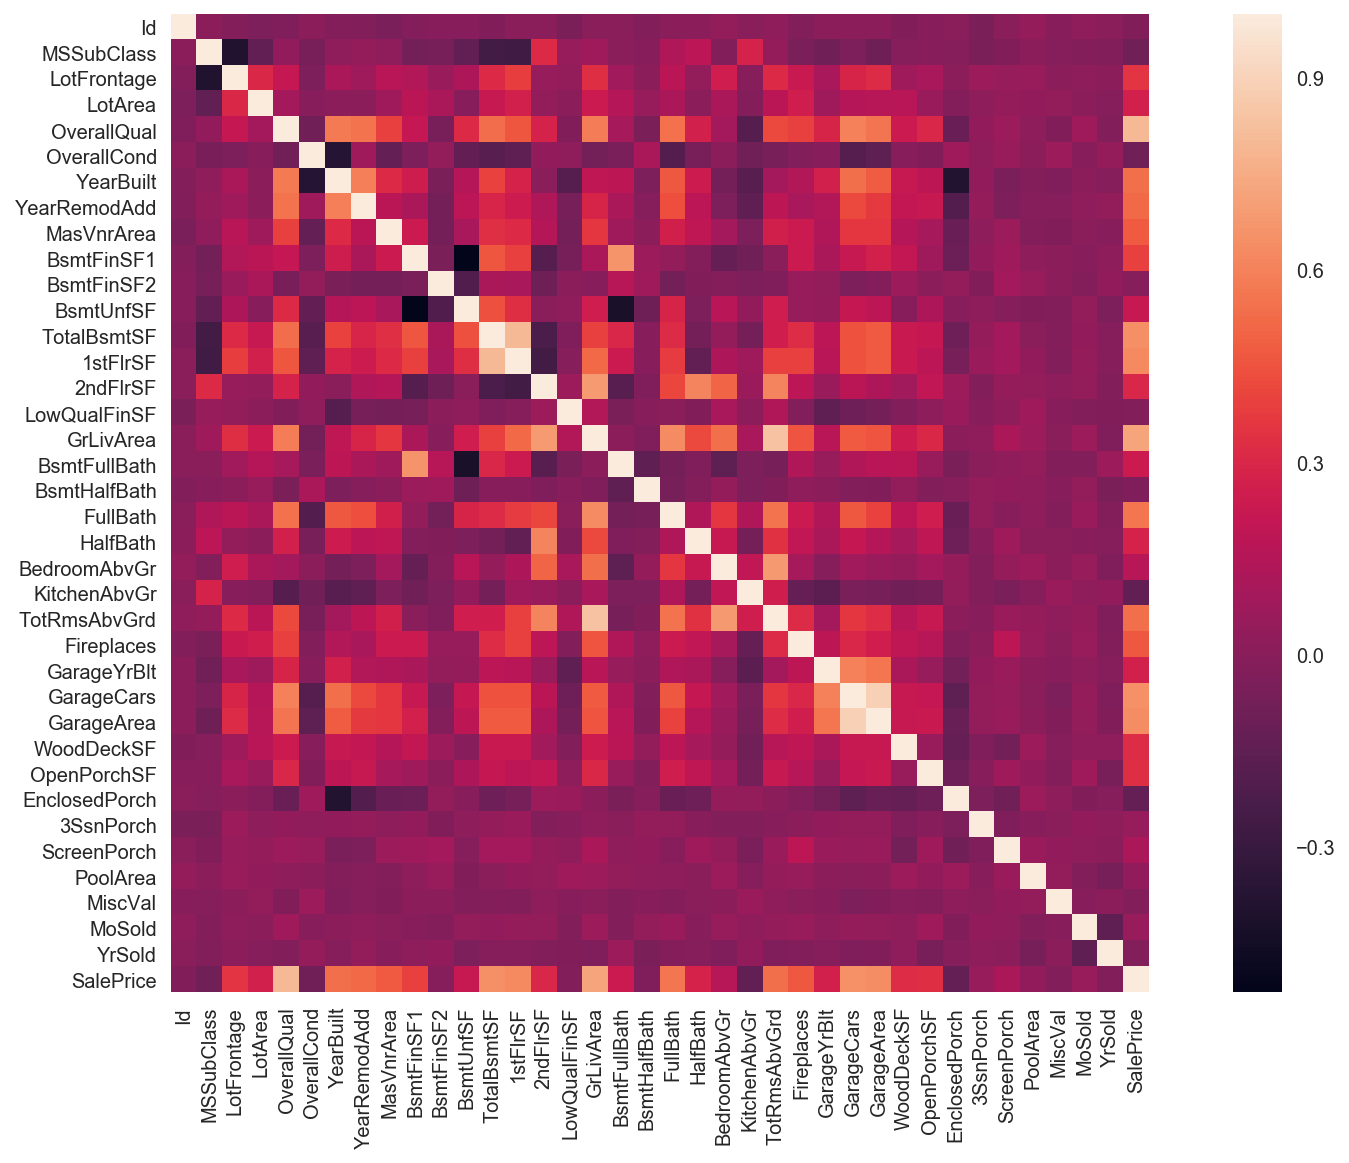

In [29]:
f, ax = plt.subplots(figsize = (15,9))
sns.heatmap(corrmat, vmax = 1, square=True)

In [30]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap

In [31]:
#get the rows of a DataFrame sorted by the n largest values of columns
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index 
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'GarageArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [32]:
#A 1-D or 2-D array containing multiple variables and observations.
#Each row of x represents a variable, and each column a single observation of all those variables.
#Also see rowvar below.
cm = np.corrcoef(df_train[cols].values.T)
cm

array([[1.        , 0.80085836, 0.7205163 , 0.64925633, 0.6465845 ,
        0.63696359, 0.62523472, 0.55904824, 0.53746177, 0.53527943],
       [0.80085836, 1.        , 0.5835192 , 0.59873889, 0.53266599,
        0.55490469, 0.46204182, 0.54379093, 0.4158339 , 0.57171183],
       [0.7205163 , 0.5835192 , 1.        , 0.47405779, 0.39482918,
        0.45451169, 0.52292024, 0.63516121, 0.83397862, 0.19264495],
       [0.64925633, 0.59873889, 0.47405779, 1.        , 0.44860597,
        0.88688169, 0.44586136, 0.46532474, 0.35806868, 0.53674866],
       [0.6465845 , 0.53266599, 0.39482918, 0.44860597, 1.        ,
        0.47200253, 0.80075899, 0.31977784, 0.25913311, 0.39986661],
       [0.63696359, 0.55490469, 0.45451169, 0.88688169, 0.47200253,
        1.        , 0.4742458 , 0.40078044, 0.3254668 , 0.47731136],
       [0.62523472, 0.46204182, 0.52292024, 0.44586136, 0.80075899,
        0.4742458 , 1.        , 0.37463068, 0.39063922, 0.27992871],
       [0.55904824, 0.54379093, 0.6351612

[]

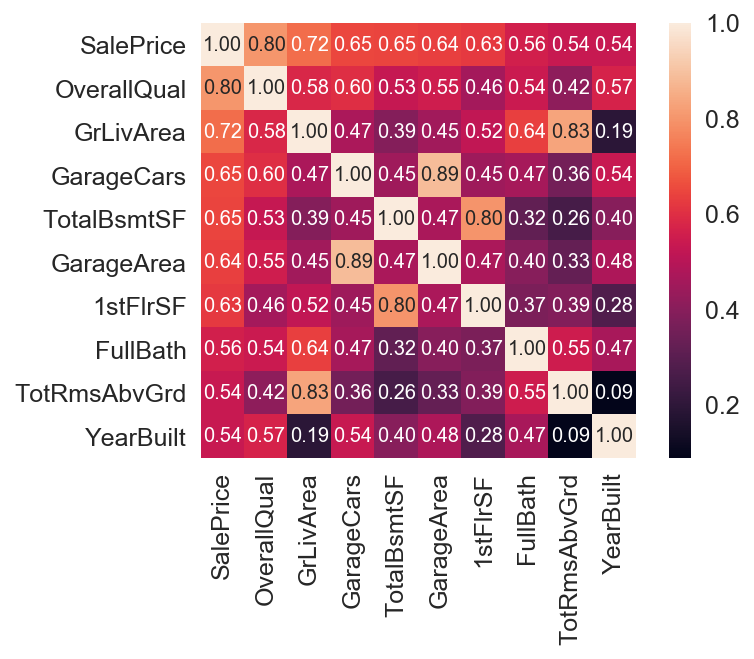

In [33]:
sns.set(font_scale=1.25)
hm=sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',\
              annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.plot()

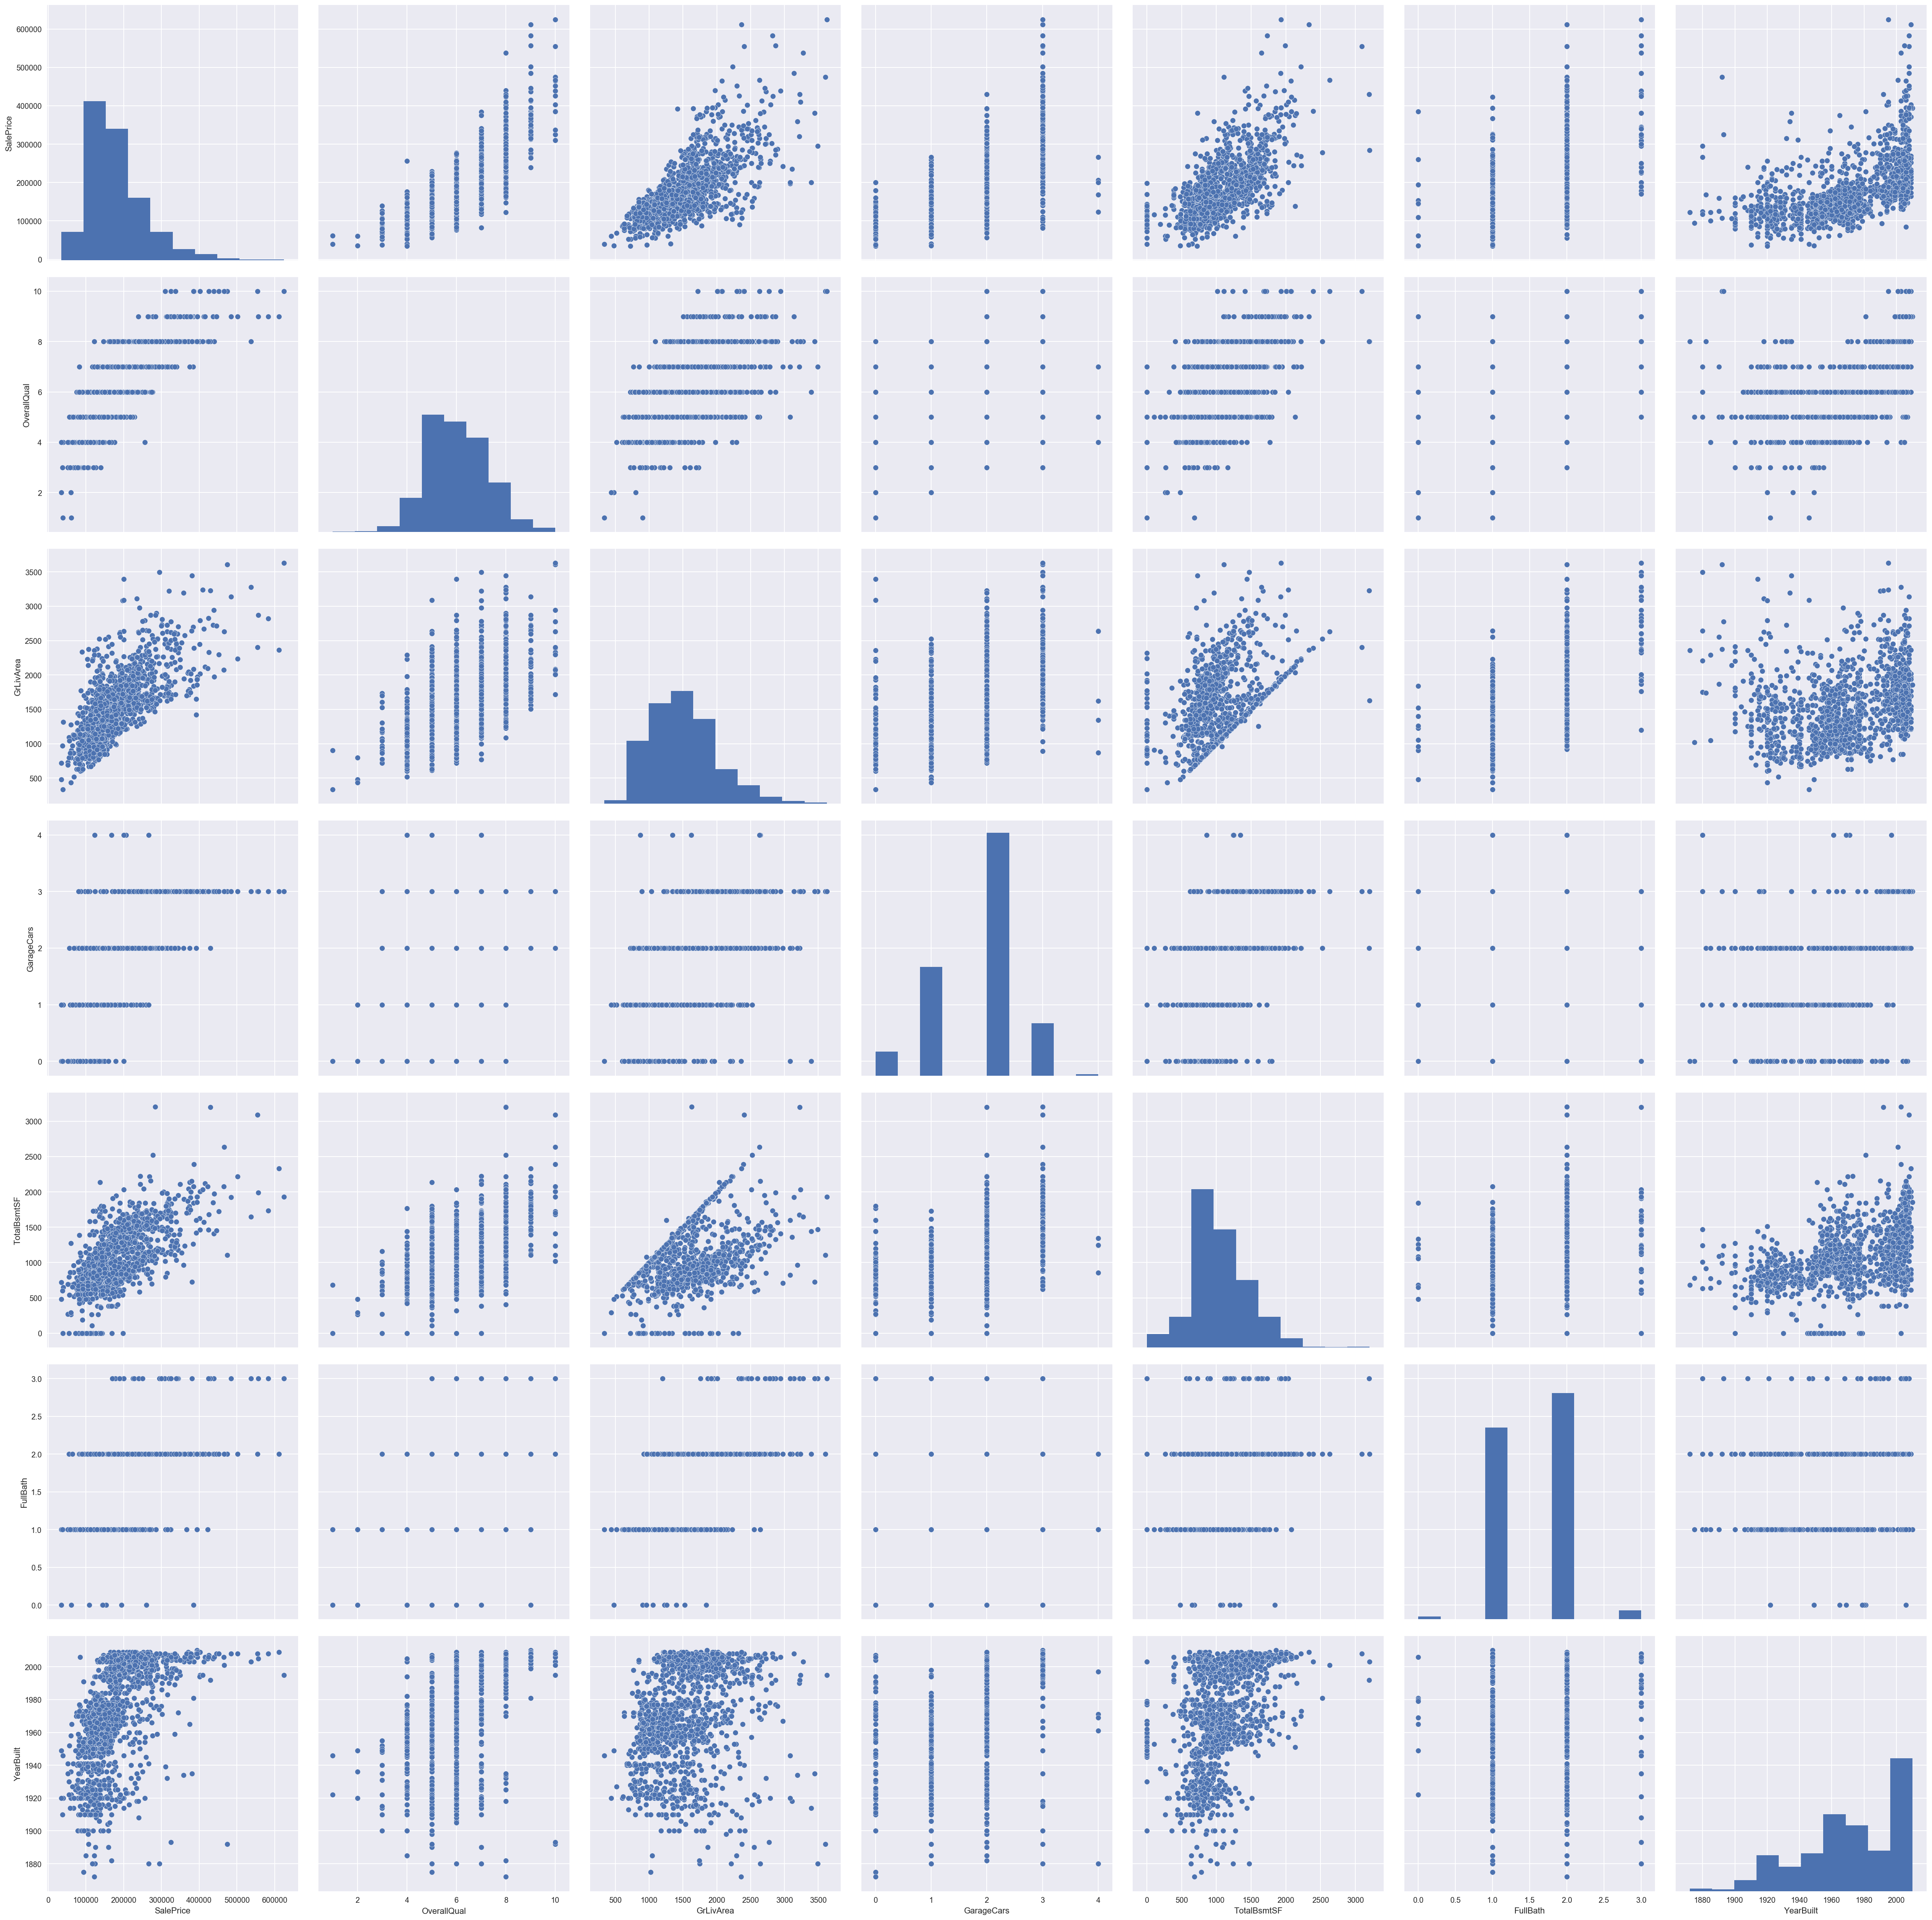

In [37]:
sns.set()
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size=5)
plt.show()

## 5. Outliers 처리하기 2

- https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[[ 0.36974924]
 [ 0.01759178]
 [ 0.56539227]
 ...
 [ 1.12623562]
 [-0.49597117]
 [-0.42586575]]
outer range(low) of the distribution:
[[-1.89449276]
 [-1.88913214]
 [-1.85536416]
 [-1.83710414]
 [-1.82797413]
 [-1.67145971]
 [-1.66493827]
 [-1.6323311 ]
 [-1.6323311 ]
 [-1.61937953]]
outer range(high) of the distribution:
[[3.73480935]
 [3.84567374]
 [3.97610242]
 [4.1957052 ]
 [4.66737446]
 [4.88910323]
 [4.90972401]
 [5.25342968]
 [5.62807304]
 [5.80210404]]


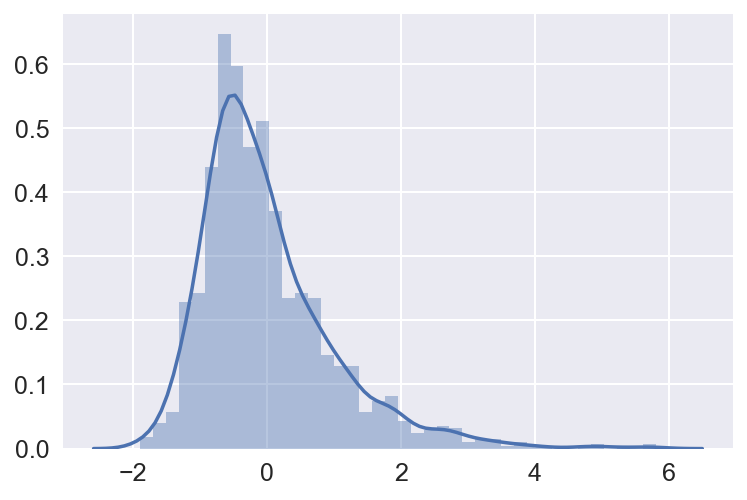

In [34]:
#standarizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
print(saleprice_scaled)
sns.distplot(saleprice_scaled)

low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range(low) of the distribution:')
print(low_range) # not too far from 0
print('outer range(high) of the distribution:')
print(high_range) #far from 0 and the 7 something values are really out of range. be careful with those two 7.something values

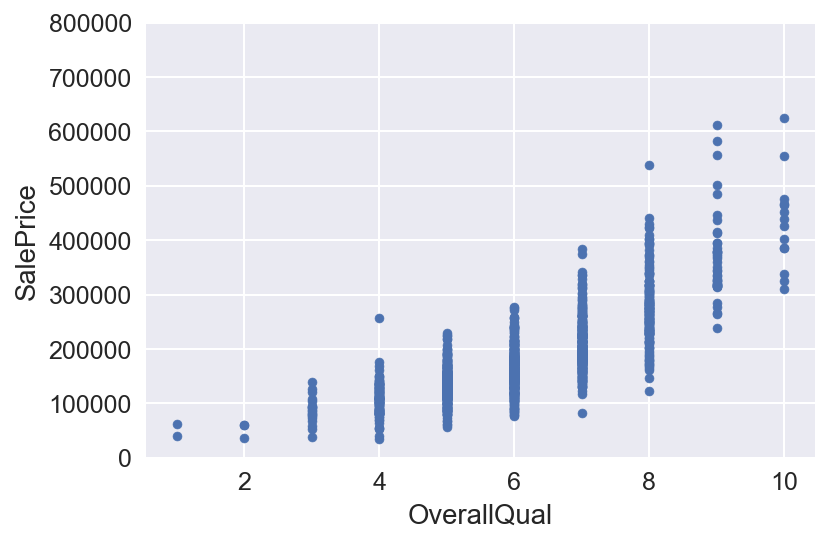

In [35]:
#Bivariate analysis
#bivariate analysis saleprice/grlivarea
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice',ylim=(0,800000));

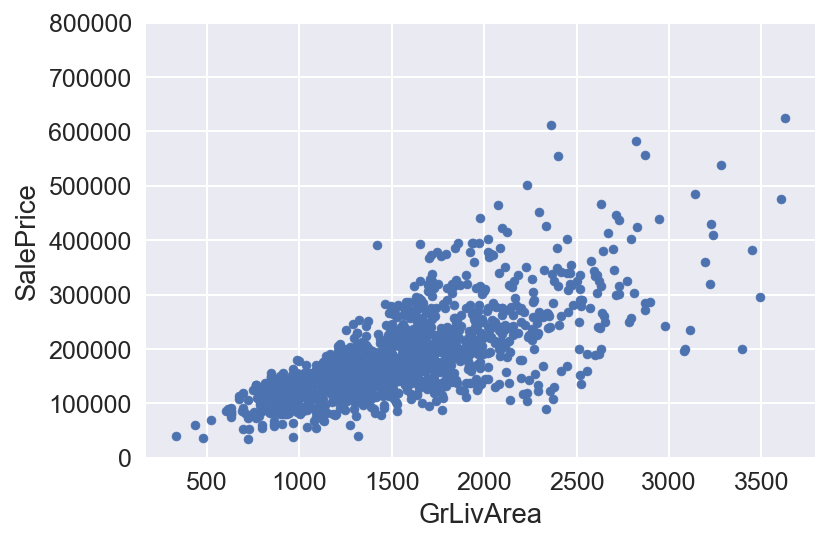

In [36]:
#bivariate analysis saleprice/GrLivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice',ylim=(0,800000));

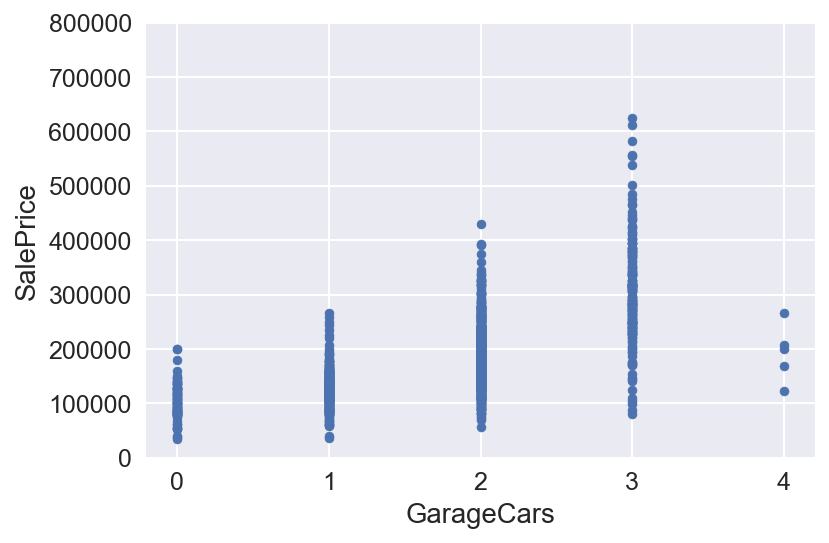

In [37]:
#bivariate analysis saleprice/GarageCars
var = 'GarageCars'
data = pd.concat([df_train['SalePrice'], df_train[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [38]:
df_train[(df_train['GarageCars']==4) & (df_train['SalePrice'] < 300000)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
420    421          90       RM         78.0     7060   Pave  None      Reg   
747    748          70       RM         65.0    11700   Pave  Pave      IR1   
1190  1191         190       RL         73.0    32463   Pave  None      Reg   
1340  1341          20       RL         70.0     8294   Pave  None      Reg   
1350  1351          90       RL         91.0    11643   Pave  None      Reg   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
420          Lvl    AllPub    ...            0   None  None        None   
747          Lvl    AllPub    ...            0   None  None        None   
1190         Low    AllPub    ...            0   None  None        None   
1340         Lvl    AllPub    ...            0   None  GdWo        None   
1350         Lvl    AllPub    ...            0   None  None        None   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
420        0     11   2008        WD         Alloca     206300  
747        0      5   2009        WD         Normal     265979  
1190       0      3   2007        WD         Normal     168000  
1340       0      6   2007        WD         Normal     123000  
1350       0      8   2009        WD         Normal     200000  

[5 rows x 81 columns]

In [39]:
df_train = df_train.drop(df_train[df_train['Id']==421].index)
df_train = df_train.drop(df_train[df_train['Id']==748].index)
df_train = df_train.drop(df_train[df_train['Id']==1191].index)
df_train = df_train.drop(df_train[df_train['Id']==1341].index)
df_train = df_train.drop(df_train[df_train['Id']==1351].index)

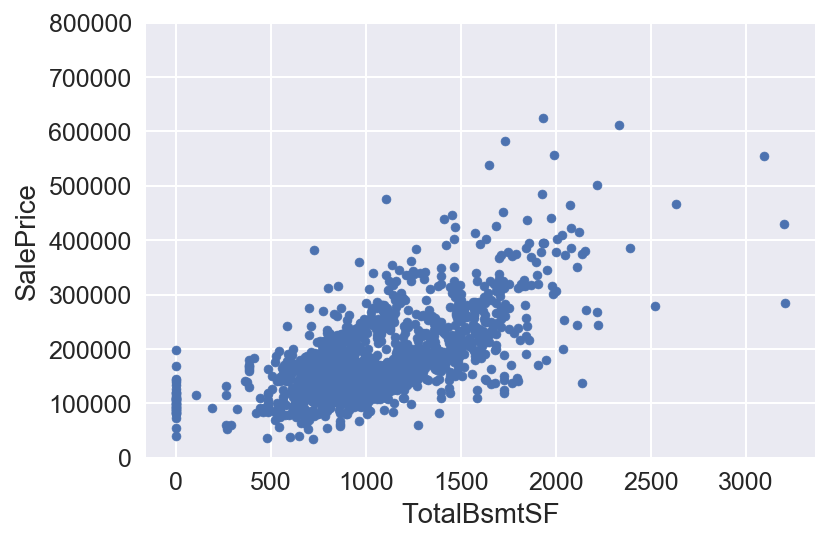

In [40]:
#bivariate analysis saleprice/TotalBsmtSF
var = "TotalBsmtSF"
data = pd.concat([df_train['SalePrice'], df_train[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [41]:
df_train[(df_train['TotalBsmtSF'] > 3000) & (df_train['SalePrice'] < 300000)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
332  333          20       RL         85.0    10655   Pave  None      IR1   

    LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
332         Lvl    AllPub    ...            0   None  None        None   

    MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
332       0     10   2009        WD         Normal     284000  

[1 rows x 81 columns]

In [42]:
df_train = df_train.drop(df_train[df_train['Id']==333].index)

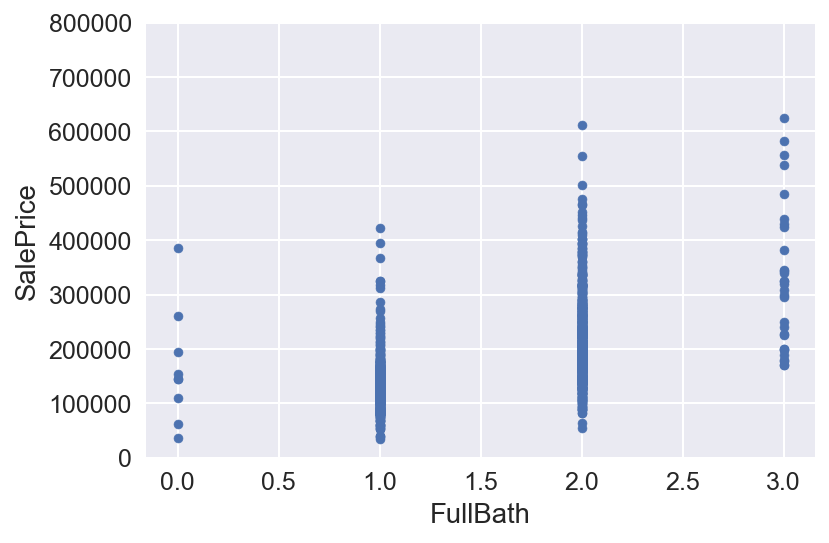

In [43]:
#bivariate analysis saleprice/FullBath
var = "FullBath"
data = pd.concat([df_train['SalePrice'], df_train[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

# 6. 정규화
- https://datascienceschool.net/view-notebook/f43be7d6515b48c0beb909826993c856/
- https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

- 이제 다중회귀분석에 적용하기 위해 'SalePrice'가 앞서 고른 변수들과 어떤 관계가 있는지 통계적 가정을 통해 이해해야한다.
- Hair et al. (2013)에 따르면, 1.Normality 2.Homoscedasticity 3.Linearity 4.Absence of correlated error를 고려해야한다.
- Normality는 data가 normal distribution 모양을 하고 있어야 함을 의미한다. 회귀분석에서는 잔차가 확률변수로 정의되므로, 정규분포를 따라야 회귀분석 모델로써 분석이 가능하기 때문이다. 하지만 표본의 수가 많을 경우(>200) 중심극한정리에 의해 정규성을 가정한다. 하지만 normality를 수행하면 이분산성(Homoscedasticity)와 같은 문제들을 피할 수 있다는 장점이 있으므로, 정규화 해보자.
- 이분산성이란 잔차의 제곱의 평균이 표본이 달라짐에 따라 상이해지는 경우를 의미한다. 잔차의 제곱의 평균이 상수일때는 동분산성이라고 하는데, 동분산성 가정이 지켜지지 않을 경우, 통상 최소자승법(OLS)에 의해 구해진 타겟값은 더이상 효율적이지 않다.(모든 선형회귀추정량 중에 최소자승법 추정량이 가장 작은 분산을 갖는다고 말할 수 없게 된다.)
- *정규성 체크사항

   - 평균과 중앙값의 차이가 많이 나지 않아야 한다. ( 그래프로 확인가능, 이상값 확인 들 )

   - 왜도(Skewness)와 첨도(Kurtosis)값이 -2 ~ 2 사이에 위치하는지 확인
- 사실 회귀분석에서는 결과변수만 정규분포면 회귀분석을 할 수 있다고 한다.


 mu = 180036.49 and sigma = 76726.94



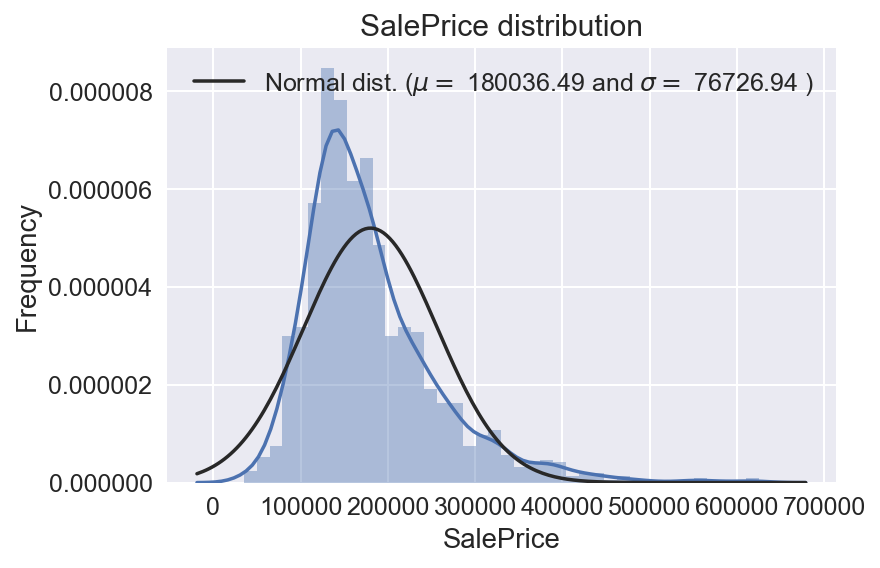

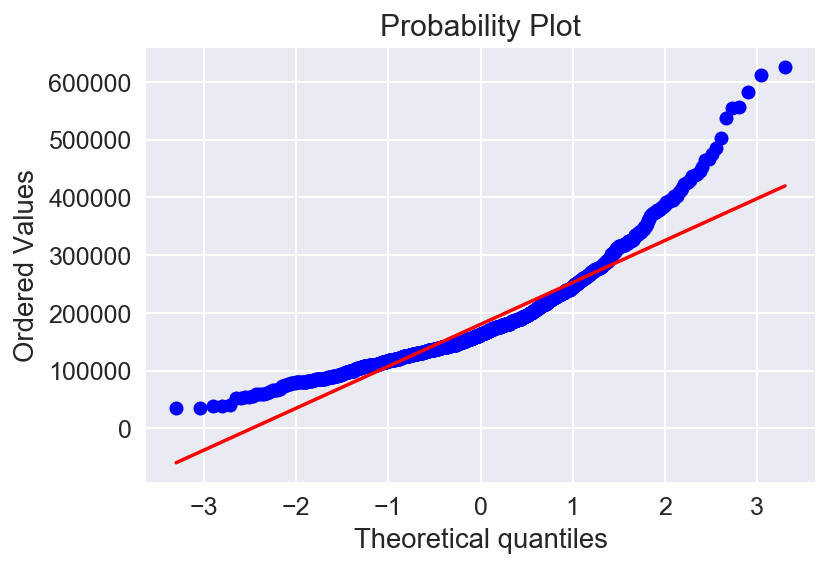

In [45]:
sns.distplot(df_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

In [44]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print('Kurtosis: %f' % df_train['SalePrice'].kurt())

Skewness: 1.571025
Kurtosis: 3.899219


- 'Sale Prices'는 normal distribution을 띄고 있지 않다. 뾰족한 모양을 가지고 있으므로, normal한 모양을 취해주겠다.
- Skewness가 양수일 경우 log를 취해주면, 이 점이 해결된다.


 mu = 12.02 and sigma = 0.40



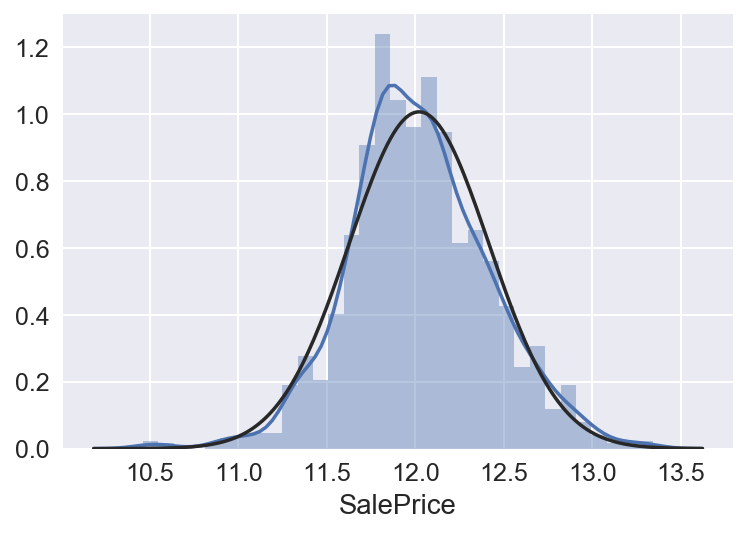

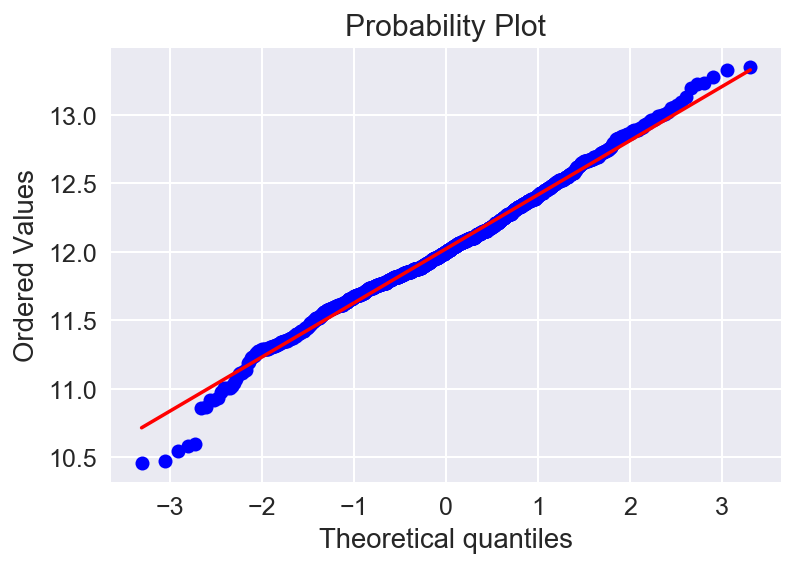

In [45]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

- 그럼 변수 별로 살펴보자.


 mu = 1505.33 and sigma = 495.58

Skewness: 0.836258
Kurtosis: 1.006162


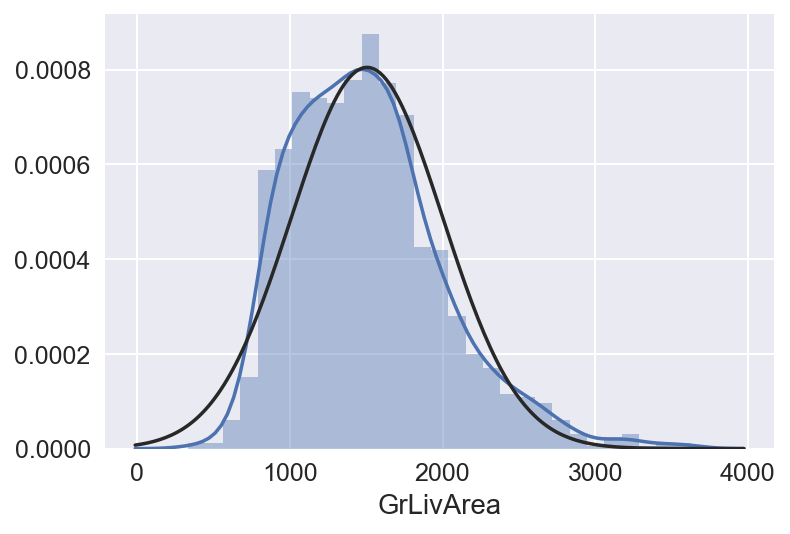

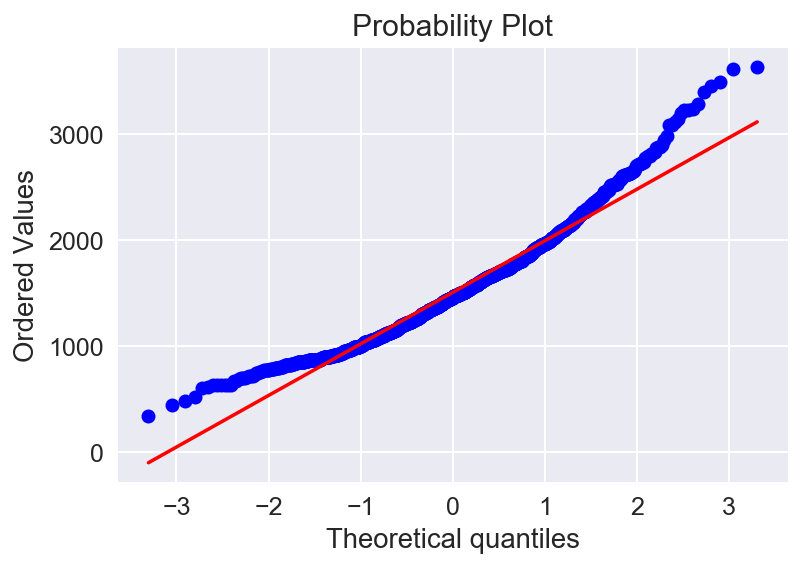

In [47]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

(mu, sigma) = norm.fit(df_train['GrLivArea'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print("Skewness: %f" % df_train['GrLivArea'].skew())
print('Kurtosis: %f' % df_train['GrLivArea'].kurt())


 mu = 7.26 and sigma = 0.33



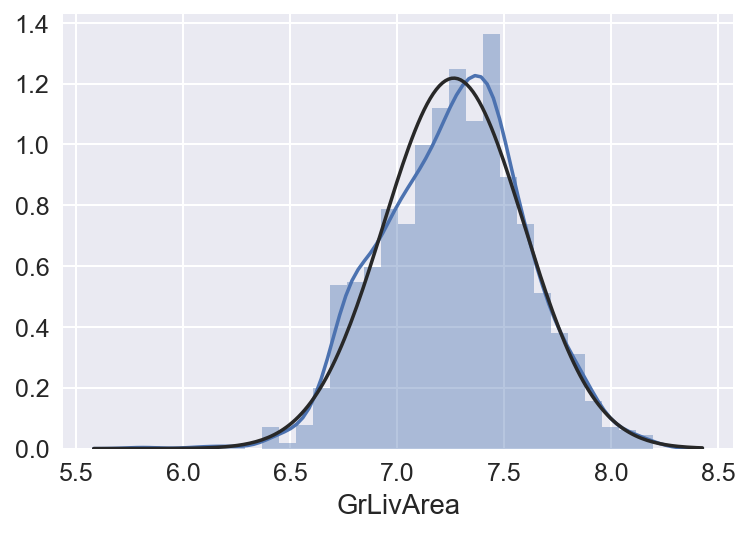

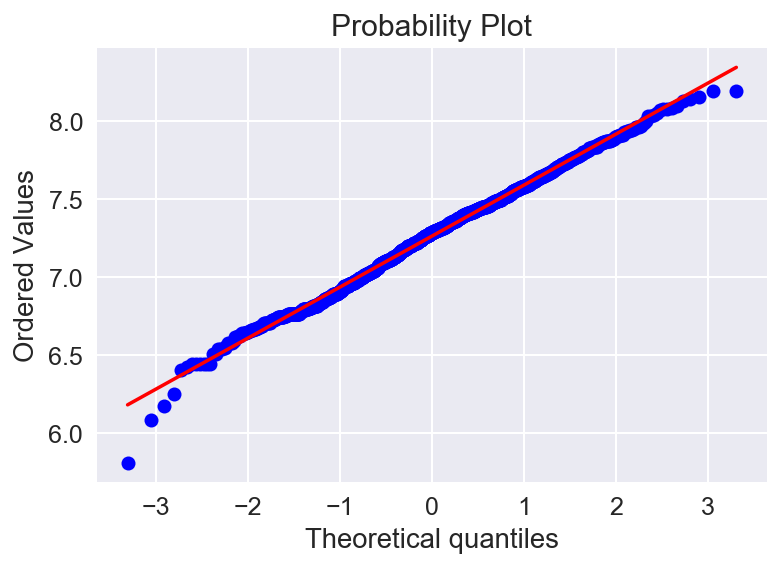

In [48]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

(mu, sigma) = norm.fit(df_train['GrLivArea'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


 mu = 1048.70 and sigma = 408.76

Skewness: 0.412937
Kurtosis: 1.396509


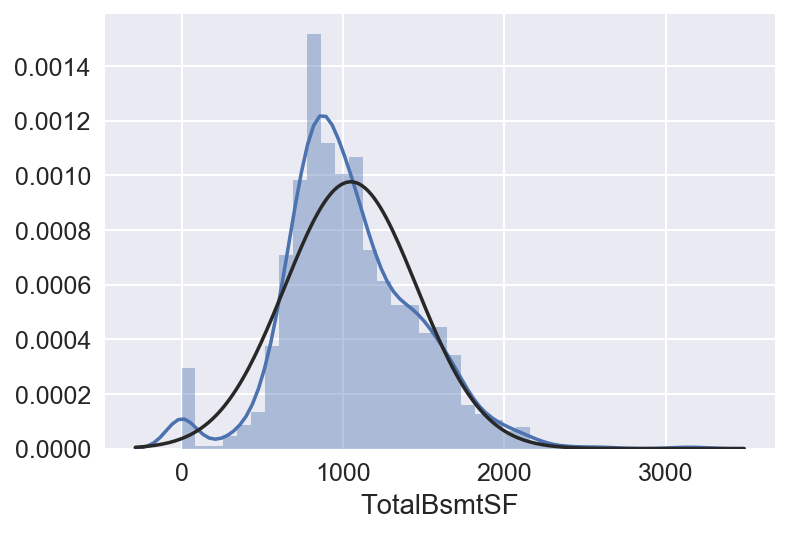

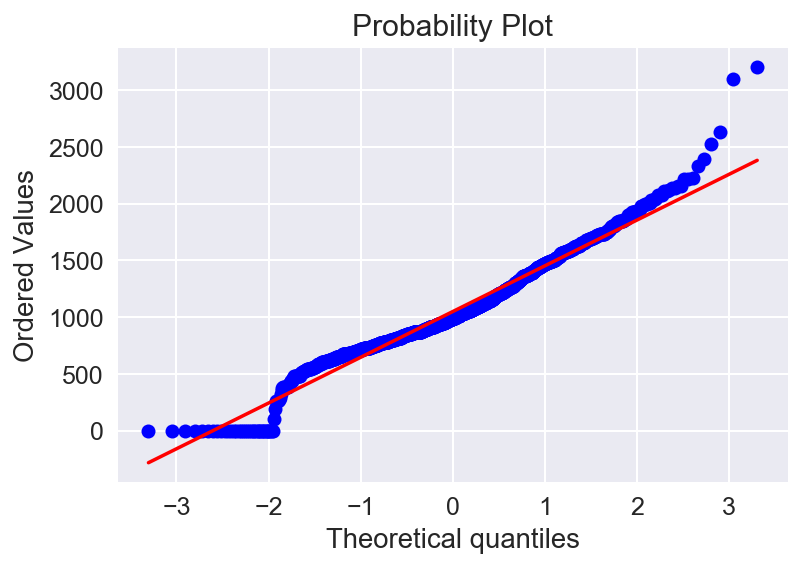

In [49]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

(mu, sigma) = norm.fit(df_train['TotalBsmtSF'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
print("Skewness: %f" % df_train['TotalBsmtSF'].skew())
print('Kurtosis: %f' % df_train['TotalBsmtSF'].kurt())

- 하지만 'TotalBsmtSF'의 경우 0인 값들이 존재해, log를 취할 수 없는 value가 존재한다.
- 임의로, 0인 값들을 지우고 log를 취해보겠다.

In [50]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [51]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


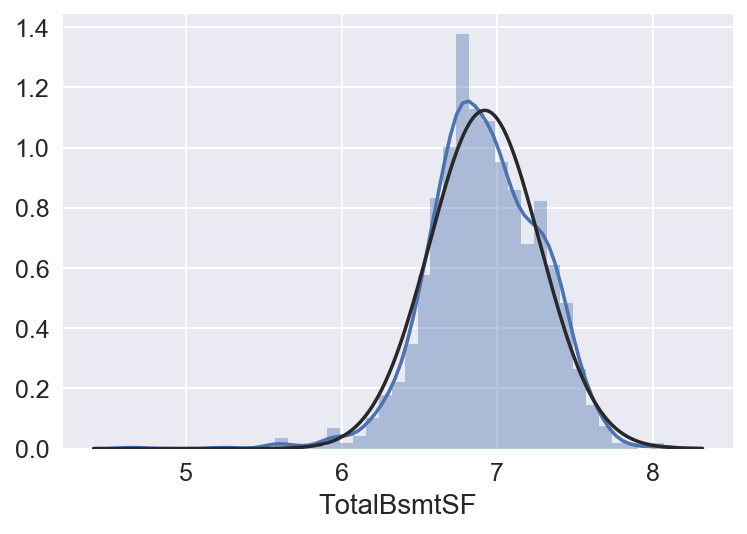

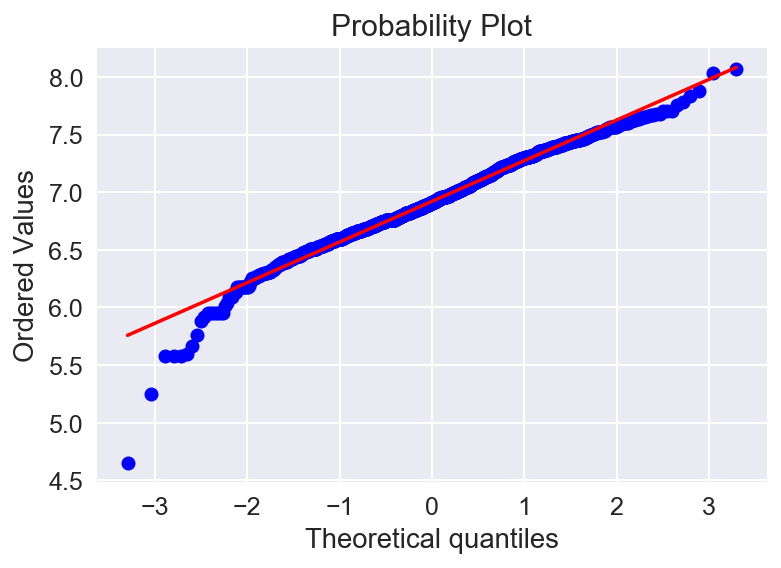

In [52]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

- 이제 이분산성을 확인해보자.

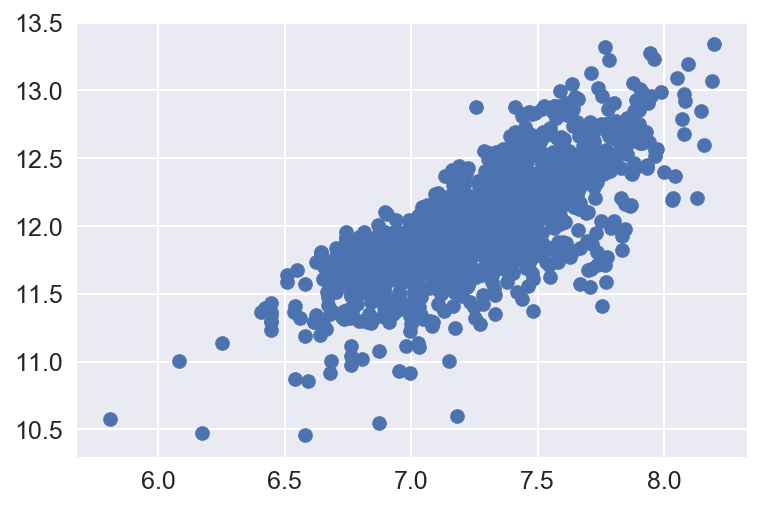

In [53]:
plt.scatter(df_train['GrLivArea'], df_train['SalePrice'])

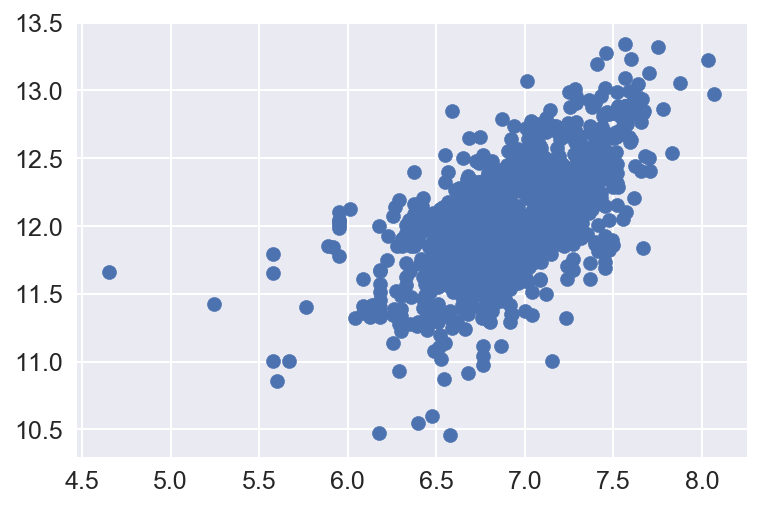

In [54]:
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice'])